In [15]:
import f90nml
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x,n):
    return np.sinh(n*B)/n/n*np.sin(n*x)

In [80]:
print('Post processing :')
# Lecture du fichier conf.nml
nml: f90nml.namelist = f90nml.read('conf.nml')

# Chargement des paramètres
L: float = nml['conf']['L']
B: float = nml['conf']['B']
alpha: float = nml['conf']['alpha']
Ns: int = nml['conf']['Ns']
Nk: int = nml['conf']['Nk']
Nx: int = nml['conf']['Nx']
Ny: int = nml['conf']['Ny']
filename = nml['conf']['filename']

sol:int = nml['articleSol']['solN']

x = np.linspace(0., L, Nx)
y = np.linspace(0., B, Ny)

data = np.genfromtxt(filename)
print('sol selected : ', sol)

Post processing :
sol selected :  5


ValueError: x and y must have same first dimension, but have shapes (50000,) and (3000, 3000)

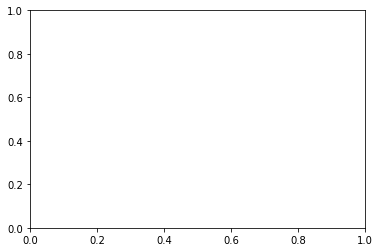

In [74]:
plt.plot(x, data, label='sol alpha=0.001')
plt.plot(x, f(x,5),label='sol exacte')
plt.legend()
plt.savefig('sol_5_comparaison_0.001.png')
plt.show()


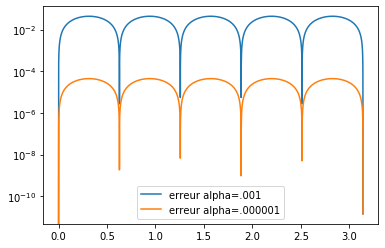

In [71]:
data1 = np.genfromtxt(filename)
plt.semilogy(x, abs(data - f(x,sol)), label='erreur alpha=.001')
plt.semilogy(x, abs(data1 - f(x,sol)), label='erreur alpha=.000001')
plt.legend()
plt.savefig('sol_5_erreur_alpha.png')
plt.show()

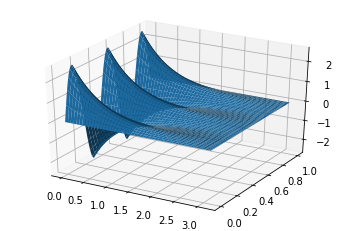

In [81]:
hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)
plt.show()
